*Export Controlled: ECCN EAR1E998*

Warning:  This document contains technical data whose export is restricted by the Bureau of Industry & Security’s Export Administration Regulations and cannot be exported or re-exported without the authorization of the U.S. government.   Violations of these export laws are subject to severe criminal penalties.  Diversion contrary to U.S. law is prohibited.

Start with:

* supply fan power of AHU36, time series data of one year
* labels (manual labeled with domain knowledge)

Objective:

* classification algorithm to automatically monitor SF status

Here, we'll be using 3 classification algorithms:

* Support vector machine
* K nearest neighbors
* Random forest

In [1]:
from UTCDAL.Design.TimeseriesAnalysis import TSAnalysis
from UTCDAL.Utilities.DataAccess.getdata_wc import get_trend

C:\Users\zhouhait\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from UTCDAL.Externals import *
from UTCDAL.Externals.Classification import *
from UTCDAL.Externals.MLUtilities import *
    
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df1 = pd.read_csv(r'C:\Users\zhouhait\demo1_hvac_new\time_series_analysis\sf_ahu_raw_36.csv', index_col=0, parse_dates=True)

In [4]:
df1.tail()

,values
2017-03-31 23:55:00,0.006554
2017-03-31 23:56:00,0.006552
2017-03-31 23:57:00,0.006541
2017-03-31 23:58:00,0.006558
2017-03-31 23:59:00,0.006532


Load labels.

In [5]:
labels = pd.read_csv(r'C:\Users\zhouhait\demo1_hvac_new\time_series_analysis\AHU36_SF_Power_label.csv')
labels.head(3)

,label
0,daytime on
1,Normal
2,Normal


## Initialize object for time series analysis

In [6]:
ts_analysis = TSAnalysis(data=df1, label=labels['label'].tolist(), data_type='spec')# if df1 satisfy the specific DAL time series format,
                                                                  # then data_type='spec'

## Generate features and feature quality
Generate time series feature for each day
•Statistical features: mean, max, median, etc.
•Trend features: slope, #peaks, etc.

Generate feature quality for each feature:
Quality labels are used to indicate when features take real numbers or special values(0 : real number; 1 ： nan; 2 : inf; 3 : -inf).

Future: interface for adding features by domain knowledge


In [7]:
ts_analysis.generate_features(freq='day', norm=True) ## It will take about several minutes to extract features 
feats = ts_analysis.features
feats_qulity = ts_analysis.quality
scaler = ts_analysis.scaler
feats_qulity.head()

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [08:21<00:00, 25.08s/it]


variable,values__abs_energy,values__absolute_sum_of_changes,"values__agg_autocorrelation__f_agg_""mean""","values__agg_autocorrelation__f_agg_""median""","values__agg_autocorrelation__f_agg_""var""","values__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","values__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","values__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","values__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","values__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,values__time_reversal_asymmetry_statistic__lag_1,values__time_reversal_asymmetry_statistic__lag_2,values__time_reversal_asymmetry_statistic__lag_3,values__value_count__value_-inf,values__value_count__value_0,values__value_count__value_1,values__value_count__value_inf,values__value_count__value_nan,values__variance,values__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
20160501.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20160502.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20160503.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20160504.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20160505.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
feats.head()

variable,values__abs_energy,values__absolute_sum_of_changes,"values__agg_autocorrelation__f_agg_""mean""","values__agg_autocorrelation__f_agg_""median""","values__agg_autocorrelation__f_agg_""var""","values__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","values__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","values__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","values__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","values__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,values__time_reversal_asymmetry_statistic__lag_1,values__time_reversal_asymmetry_statistic__lag_2,values__time_reversal_asymmetry_statistic__lag_3,values__value_count__value_-inf,values__value_count__value_0,values__value_count__value_1,values__value_count__value_inf,values__value_count__value_nan,values__variance,values__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
20160501.0,-2.158634,-2.082851,-2.181407,-2.353458,2.753210,-2.059100,0.701990,0.134686,-2.119952,-2.104289,...,-0.114886,-0.008733,0.016628,0.0,-0.115833,0.0,0.0,0.0,-2.010382,-2.228068
20160502.0,0.603252,-0.011705,0.453452,0.464988,-0.367450,0.399302,-0.135327,-0.013066,0.527982,0.337771,...,0.472355,0.607844,0.687707,0.0,-0.115833,0.0,0.0,0.0,0.677503,0.448819
20160503.0,0.534461,-0.317884,0.412341,0.408299,-0.350886,0.262759,-0.016343,0.112189,0.520926,0.252369,...,0.313323,0.235580,0.139734,0.0,-0.115833,0.0,0.0,0.0,0.667311,0.448819
20160504.0,0.484743,-0.301101,0.413855,0.408693,-0.351764,0.243568,-0.019869,0.108740,0.495537,0.232017,...,0.226075,0.164240,0.105473,0.0,-0.115833,0.0,0.0,0.0,0.616951,0.448819
20160505.0,0.949840,0.089826,0.362911,0.360792,-0.326204,0.219348,0.260446,0.424805,0.735959,0.198853,...,0.514859,0.560239,0.590974,0.0,-0.115833,0.0,0.0,0.0,1.119812,0.448819


## Visualizing special values  using plot_inspect_quality
Summarizes the proportion of special-valued outputs in each feature as a bar plot, ordered by the proportion of special-valued outputs.

In [9]:
ts_analysis.plot_inspect_quality(inspect_what='summary')#'full':shows all feature quality;
##'summary':only show bad features

No operations have problems! Nothing to inspect.


""


## Low dim representation using PCA
2D representation plotting using PCA method, containing the 
    distribution of the two principle components

C:\Users\zhouhait\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\zhouhait\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\zhouhait\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\zhouhait\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


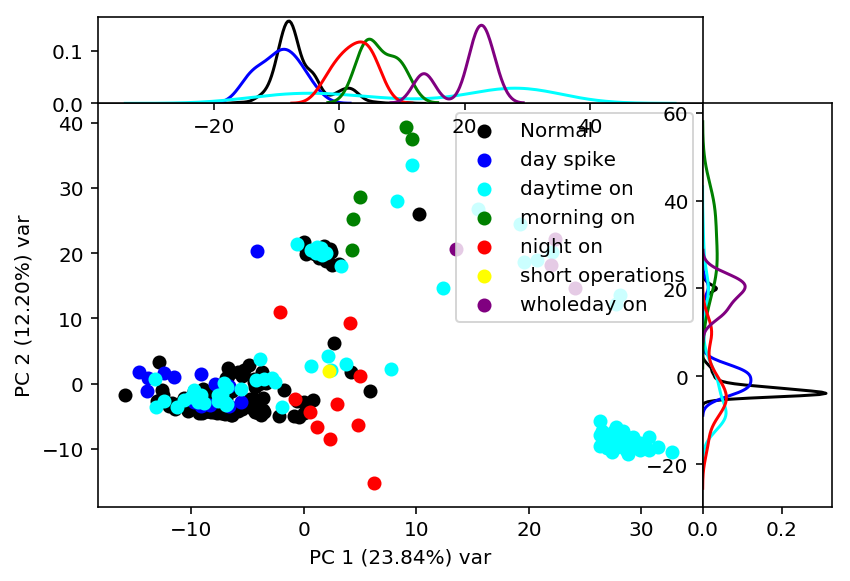

In [10]:
feats_2D = ts_analysis.plot_pca(plot=True)


## Feature clustering
For the purposes of visualizing the data matrix, it is often desirable to have the rows and columns reordered to put similar rows adjacent to one another, and similarly to place similar columns adjacent to one another. This reordering can be done using hierarchical linkage clustering. Function plot_clustering() shows information about the similarity of pairs of time series and features.

d:\mygit\utcdal\UTCDAL\Design\TimeseriesAnalysis\ts_function.py:437: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(D, method=link_row)
d:\mygit\utcdal\UTCDAL\Design\TimeseriesAnalysis\ts_function.py:451: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(D, method=link_col)


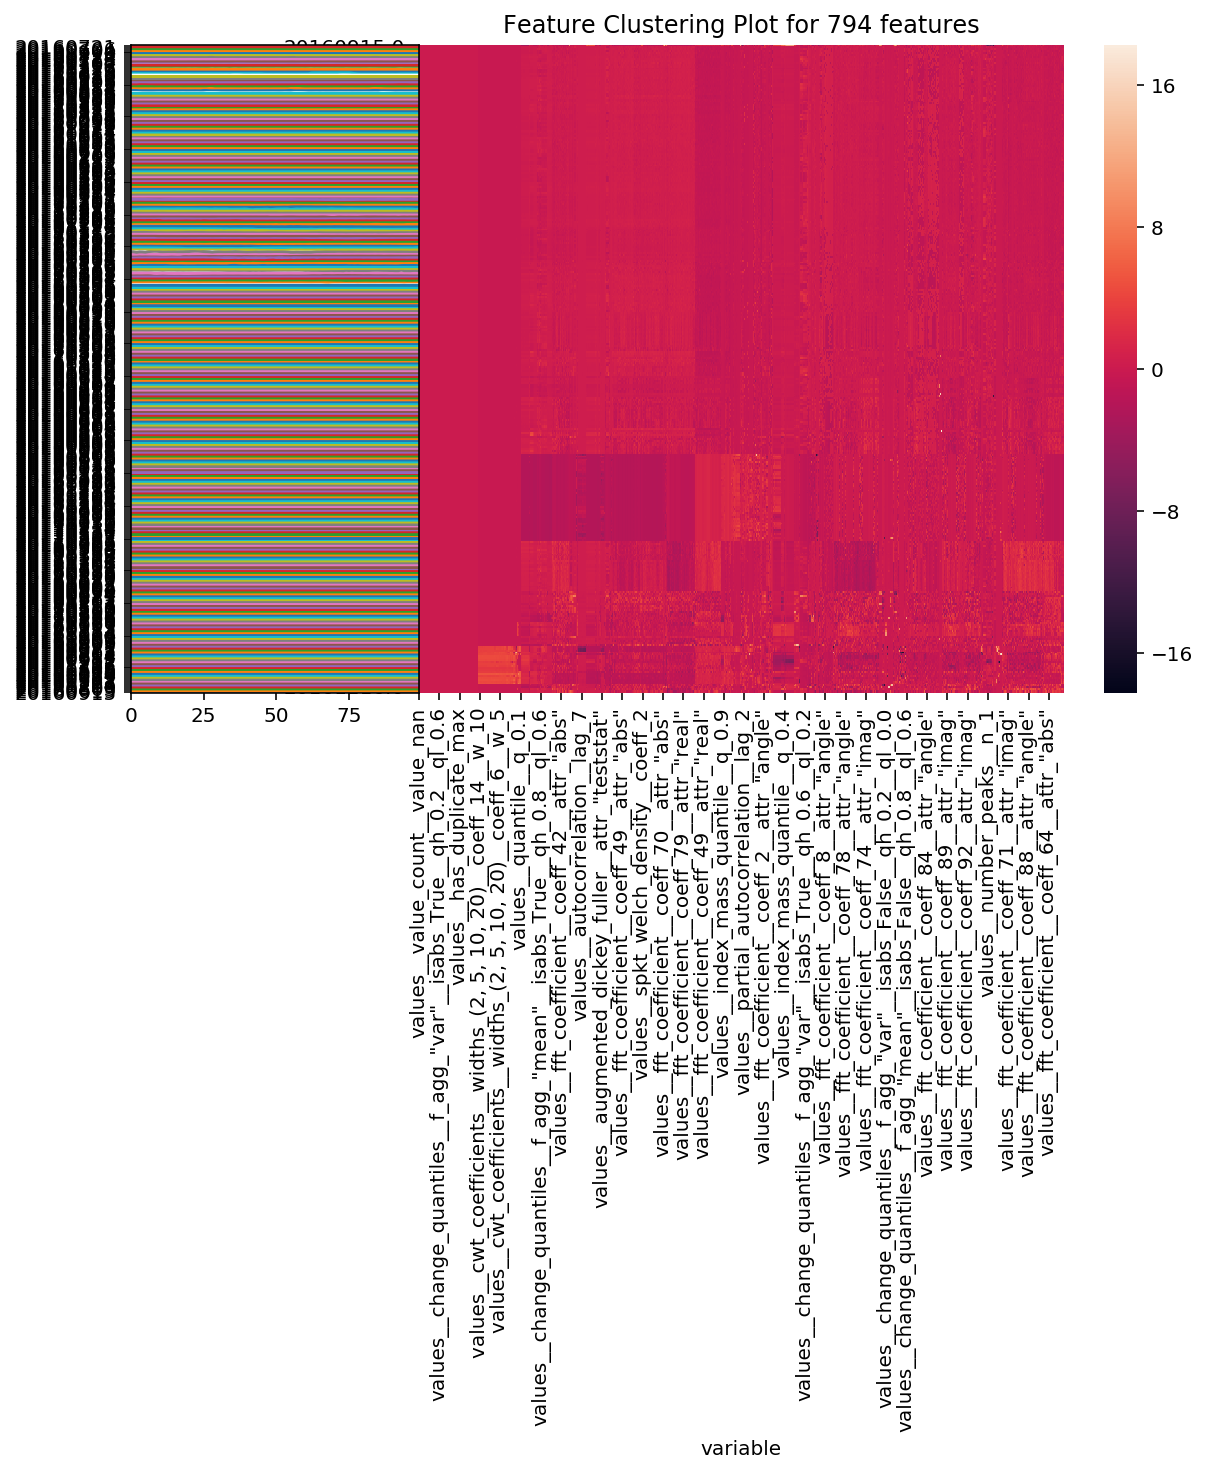

In [11]:
feature_clustering = ts_analysis.plot_clustering(plot=True)

## Top feature analysis
Find the K best features in the original features. Each features are tested using selected classifier, and K features are selected with highest accuracy.

The fist figure shows the classification performance across all features.

The second figure shows the violin plot for top K features.

The third figure shows the correlation between all pairs of top K features.


Comparing the (in-sample) performance of 794 operations for 7 classes using a logistic regression classifier...

There are a total of 40 operations


d:\mygit\utcdal\UTCDAL\Design\TimeseriesAnalysis\ts_function.py:378: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(D, method='centroid')


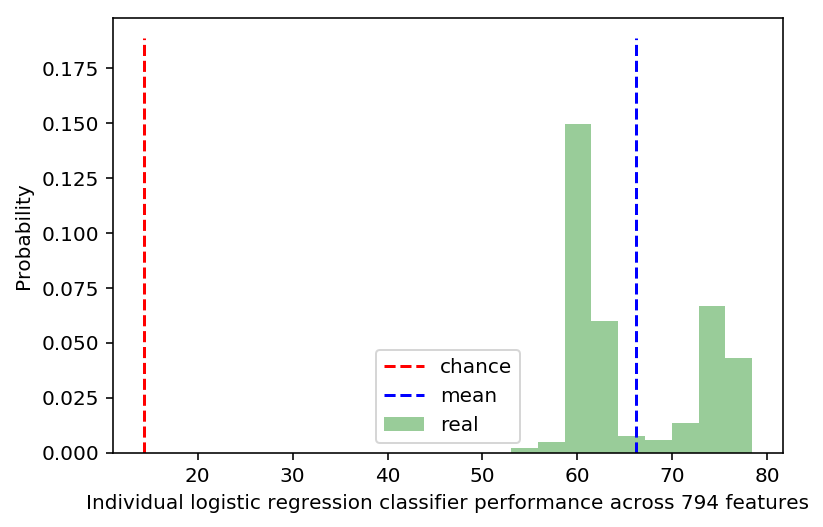

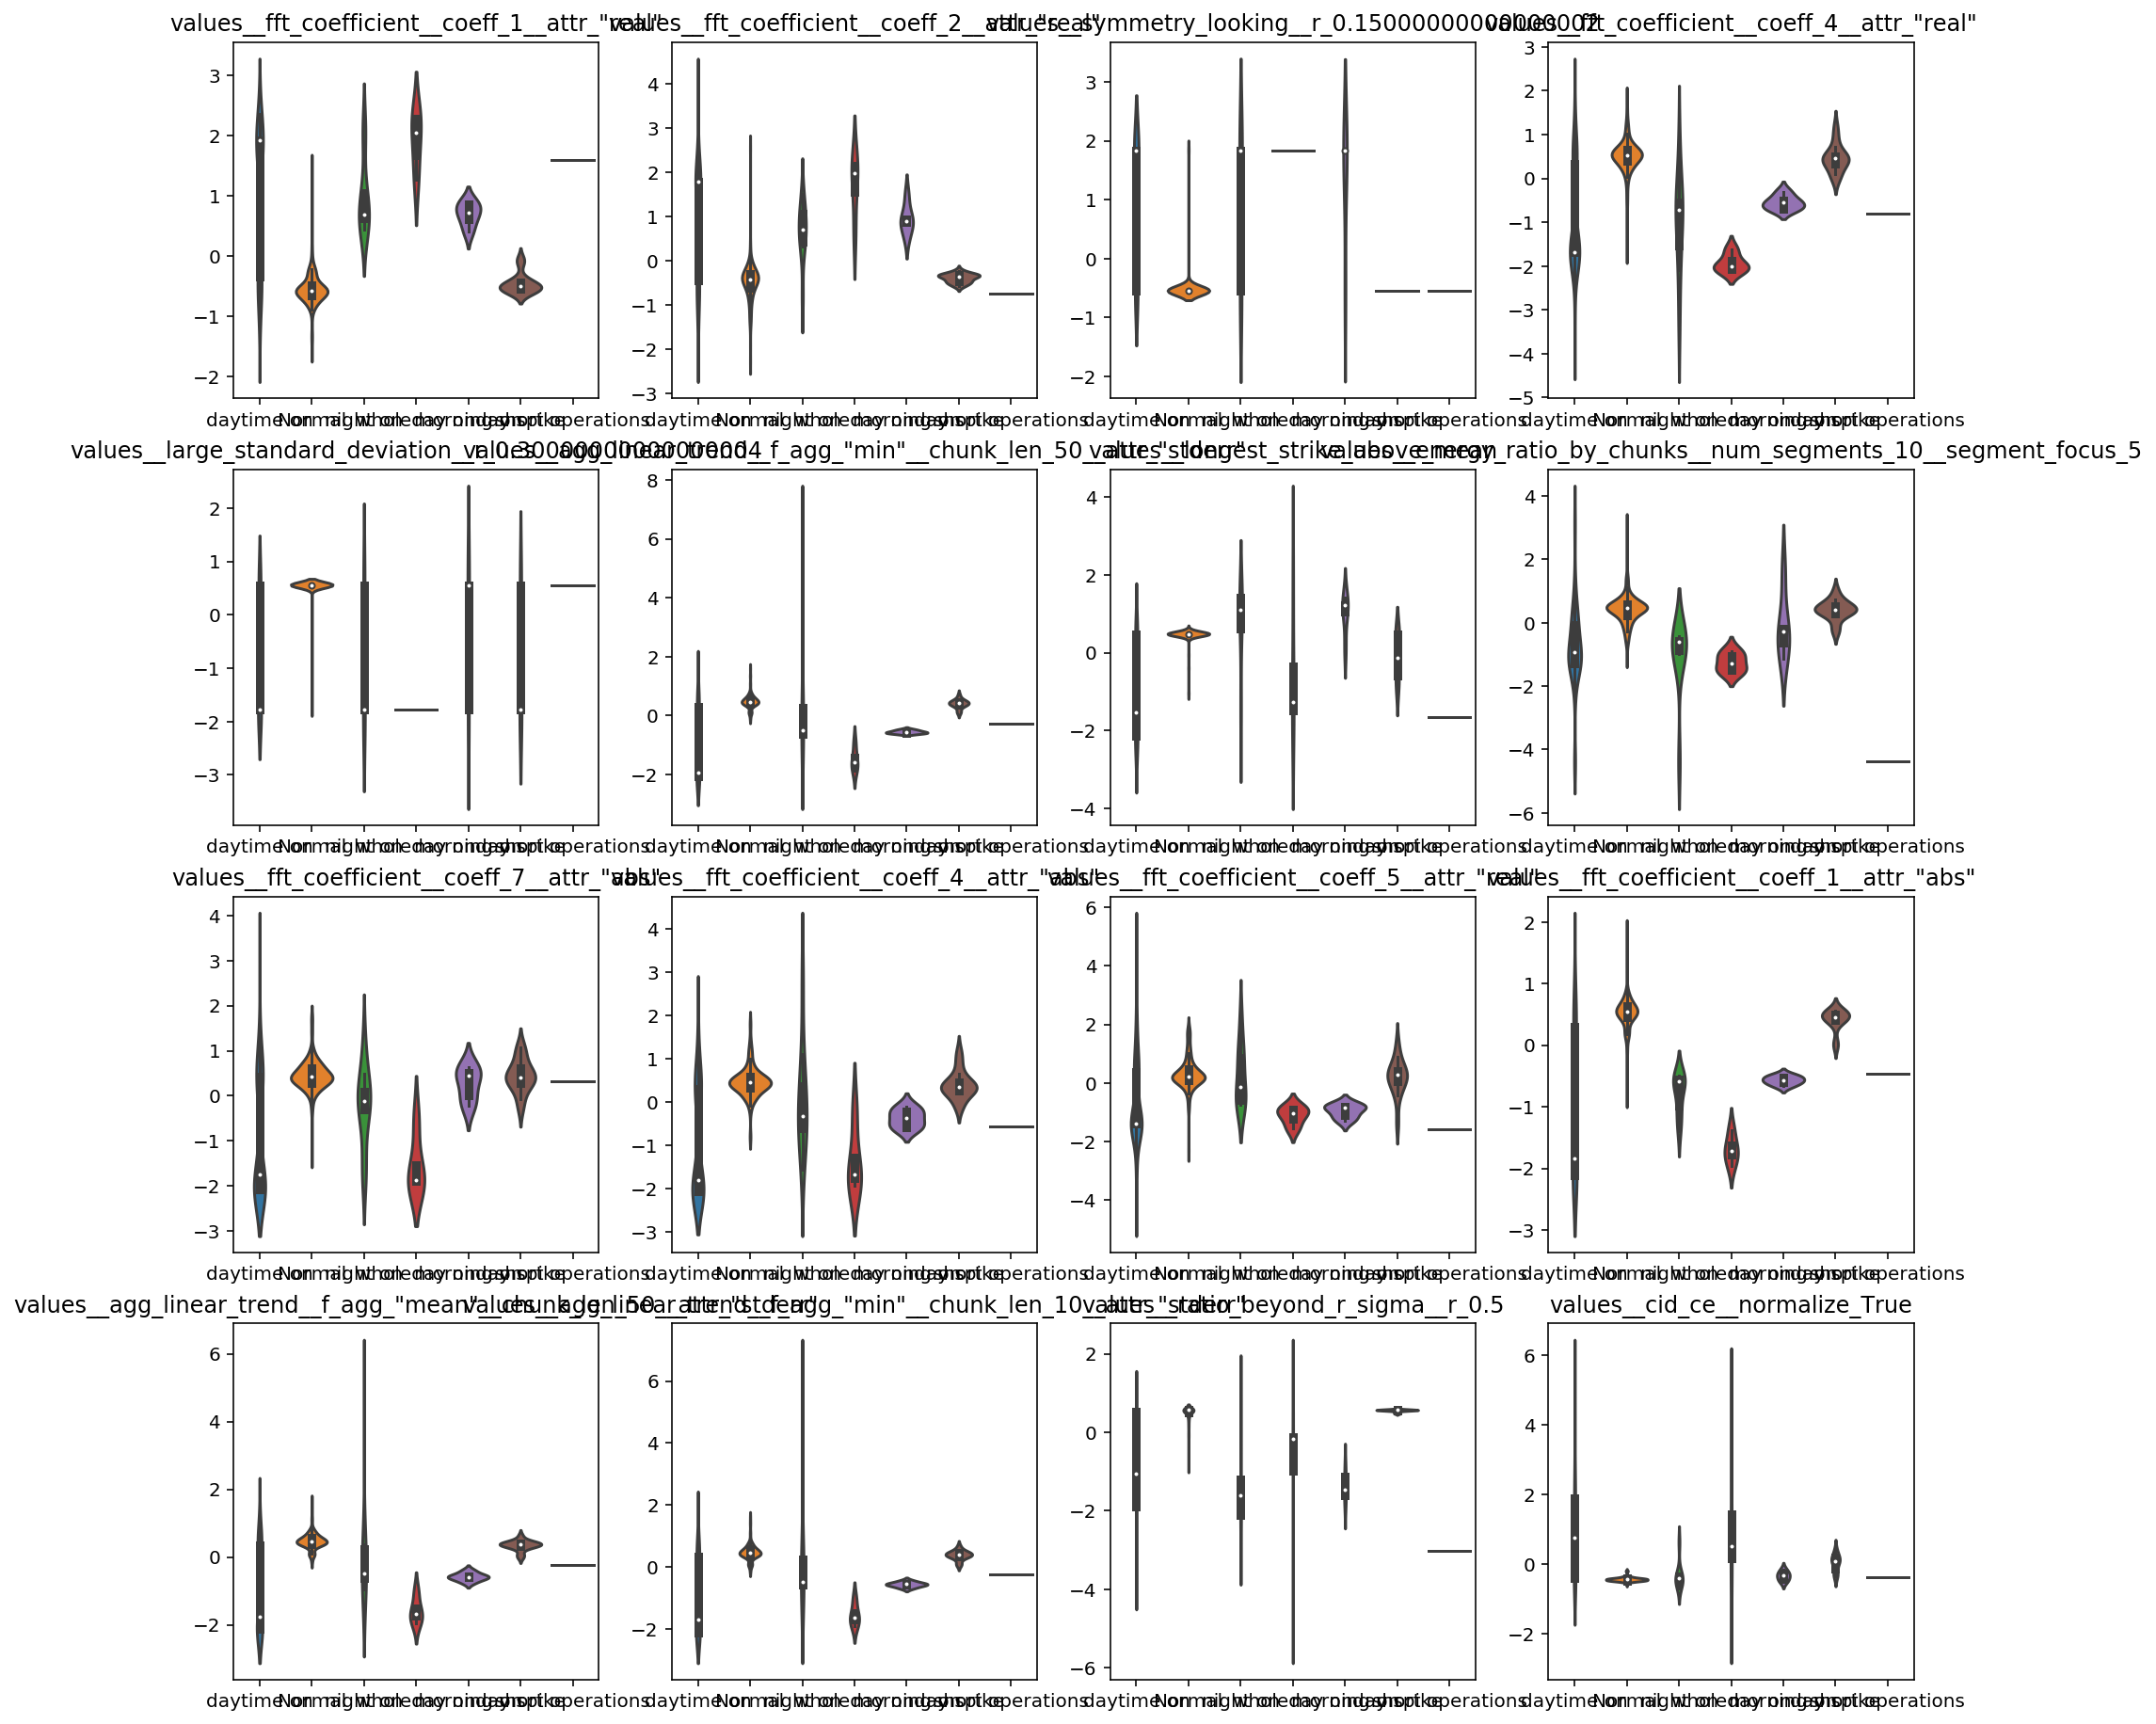

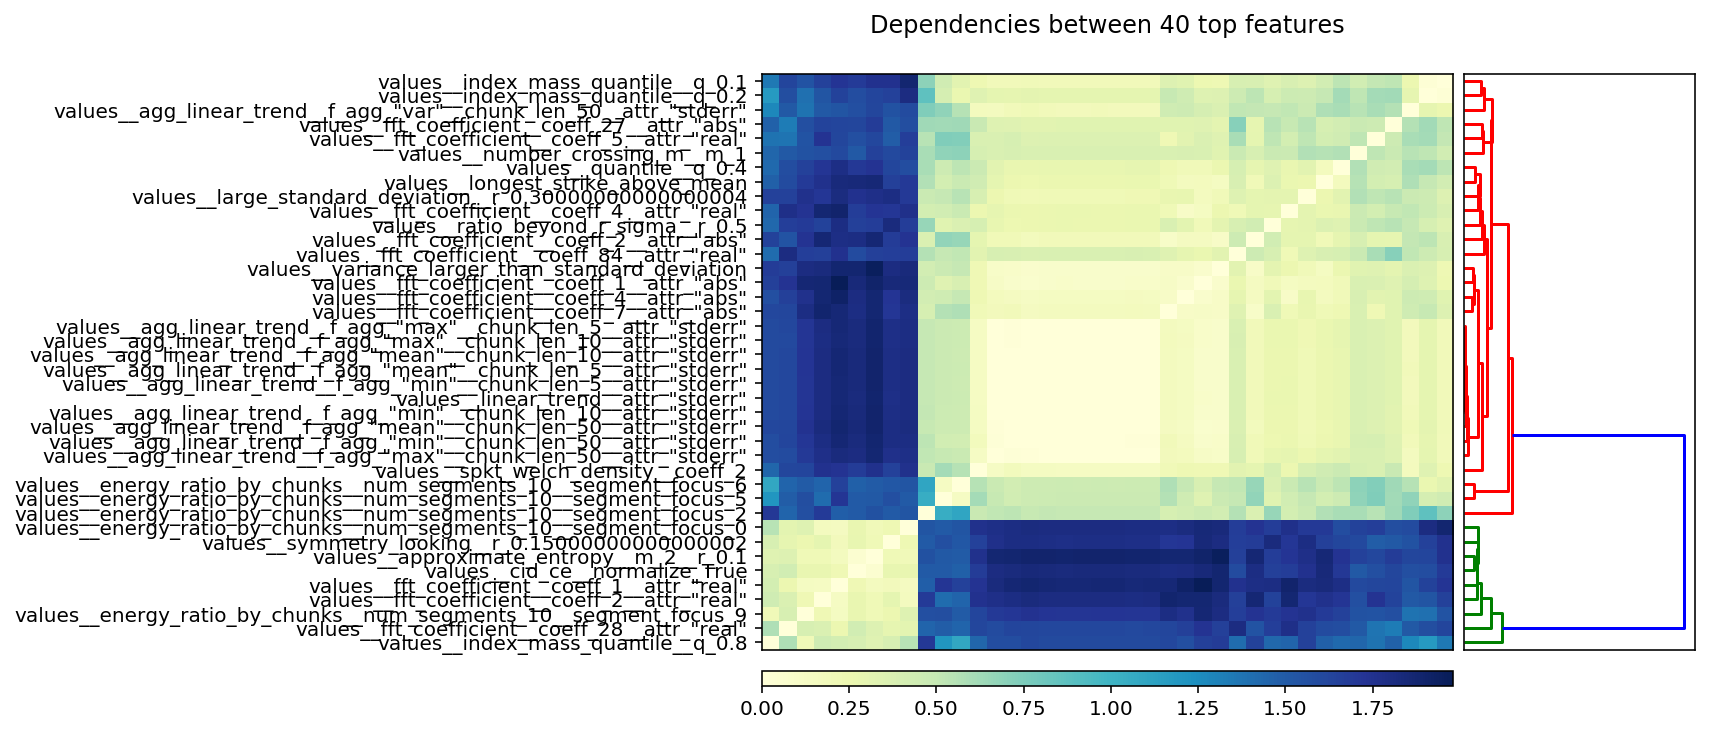

In [12]:
top_features = ts_analysis.top_features(what_test_stat='logistic_regression',num_top_features=40, plot=True)

In [13]:
top_features.head()

variable,"values__fft_coefficient__coeff_1__attr_""real""","values__fft_coefficient__coeff_2__attr_""real""",values__symmetry_looking__r_0.15000000000000002,"values__fft_coefficient__coeff_4__attr_""real""",values__large_standard_deviation__r_0.30000000000000004,"values__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""stderr""",values__longest_strike_above_mean,values__energy_ratio_by_chunks__num_segments_10__segment_focus_5,"values__fft_coefficient__coeff_7__attr_""abs""","values__fft_coefficient__coeff_4__attr_""abs""",...,values__spkt_welch_density__coeff_2,values__index_mass_quantile__q_0.8,values__approximate_entropy__m_2__r_0.1,values__energy_ratio_by_chunks__num_segments_10__segment_focus_9,"values__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""stderr""",values__energy_ratio_by_chunks__num_segments_10__segment_focus_2,"values__fft_coefficient__coeff_28__attr_""real""","values__fft_coefficient__coeff_27__attr_""abs""",values__energy_ratio_by_chunks__num_segments_10__segment_focus_0,values__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
20160501.0,1.933946,1.796459,1.842481,-1.676227,-1.781853,-2.079609,-2.232722,-2.485423,-2.070530,-2.065743,...,-1.764247,1.729240,2.049322,0.861554,-1.452664,-1.251093,1.462111,-1.685727,1.684014,-2.228068
20160502.0,-0.648864,-0.857529,-0.542746,0.901328,0.561214,0.586187,0.480171,0.183747,0.655763,0.855816,...,0.707925,-0.208567,-0.435675,-0.477299,0.100681,0.504190,0.165722,0.391168,-0.476116,0.448819
20160503.0,-0.704233,-0.590506,-0.542746,0.595416,0.561214,0.592570,0.483649,0.319291,0.612195,0.495098,...,0.656767,-0.219214,-0.499359,-0.477298,0.551493,0.106850,-0.918542,0.145339,-0.476115,0.448819
20160504.0,-0.688477,-0.532950,-0.542746,0.596530,0.561214,0.565770,0.483649,0.378366,0.563008,0.496075,...,0.591408,-0.229862,-0.524855,-0.477299,0.509708,0.080932,-0.865075,0.271573,-0.476116,0.448819
20160505.0,-0.808185,-0.971332,-0.542746,1.240346,0.561214,0.778688,0.483649,0.230214,0.860691,1.222737,...,1.273343,0.057615,-0.463871,-0.477297,1.166469,-0.410789,-1.381865,0.343994,-0.476116,0.448819


In [14]:
top_feat_name = ts_analysis.top_feature_name

In [15]:
print(top_feat_name)

['values__fft_coefficient__coeff_1__attr_"real"', 'values__fft_coefficient__coeff_2__attr_"real"', 'values__symmetry_looking__r_0.15000000000000002', 'values__fft_coefficient__coeff_4__attr_"real"', 'values__large_standard_deviation__r_0.30000000000000004', 'values__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"stderr"', 'values__longest_strike_above_mean', 'values__energy_ratio_by_chunks__num_segments_10__segment_focus_5', 'values__fft_coefficient__coeff_7__attr_"abs"', 'values__fft_coefficient__coeff_4__attr_"abs"', 'values__fft_coefficient__coeff_5__attr_"real"', 'values__fft_coefficient__coeff_1__attr_"abs"', 'values__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"stderr"', 'values__agg_linear_trend__f_agg_"min"__chunk_len_10__attr_"stderr"', 'values__ratio_beyond_r_sigma__r_0.5', 'values__cid_ce__normalize_True', 'values__index_mass_quantile__q_0.2', 'values__linear_trend__attr_"stderr"', 'values__index_mass_quantile__q_0.1', 'values__fft_coefficient__coeff_84__attr_"rea

## Train model: tune optimal parameters

In [16]:
y = labels.label.values
X = top_features.values

In [17]:
clf = SVC(C=1)
cross_val = cross_val_score(clf, X, y, cv=4)
print(f'Cross-validation score: {cross_val}\nCross-validation mean score: {cross_val.mean():.5f}')

C:\Users\zhouhait\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


Cross-validation score: [0.80232558 0.75       0.91566265 0.95061728]
Cross-validation mean score: 0.85465


Continue the trial-and-error process; find relatively good parameters

In [18]:
clf_svm = SVC(C=1)
clf_svm.fit(X, y)

clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X, y)

clf_rf = RandomForestClassifier(n_estimators=300)
clf_rf.fit(X, y);

Save the trained model for deploy

In [19]:
def save_pickle(obj, fname):
    with open(fname, 'wb') as f:
        pickle.dump(obj, f)

In [20]:
save_pickle(top_feat_name, r'C:\Users\zhouhait\demo1_hvac_new\time_series_analysis\top_feat_name.pkl')
save_pickle(scaler, r'C:\Users\zhouhait\demo1_hvac_new\time_series_analysis\scaler.pkl')
save_pickle(clf_svm, r'C:\Users\zhouhait\demo1_hvac_new\time_series_analysis\model_svm.pkl')
save_pickle(clf_knn, r'C:\Users\zhouhait\demo1_hvac_new\time_series_analysis\model_knn.pkl')
save_pickle(clf_rf, r'C:\Users\zhouhait\demo1_hvac_new\time_series_analysis\model_rf.pkl')

## For server side, need another .py file to apply model to latest data and visualize result

This logic was saved into a `.py` file.